## Random Forest - ансамблевый алгоритм|
#### Random Forest - это модель для решения задач регерессии и задач классификации. 

Достаточно гибкая модель, но сложная для интерпретации.
Идея заключается в том, чтобы вырсатить много деревьев вместо одного дерева (мудрость толпы). 

 ### 1) для задая КЛАССИФИКАЦИИ определяется БОЛЬШИНСТВОМ
 ### 2) для задач РЕГРЕССИИ определяется СРЕДНИМ ЗНАЧЕНИЕМ

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier

In [29]:
df =pd.read_excel('../Random forest/wb_teapot.xlsx', sheet_name='Sheet1')   # данные с портала WildBerries
type(df)

pandas.core.frame.DataFrame

In [30]:
df.columns

Index(['id', 'Review', 'Star', 'Value', 'brandId', 'brandName', 'goodsName',
       'isSoldOut', 'link', 'lowQuantity', 'ordersCount', 'price',
       'qualityRate', 'Вес с упаковкой (кг)', 'Длина кабеля',
       'Количество температурных режимов', 'Материал корпуса', 'Модель',
       'Мощность устройства', 'Объем чайника', 'Страна бренда',
       'Страна производитель', 'Цвет', 'sale_june'],
      dtype='object')

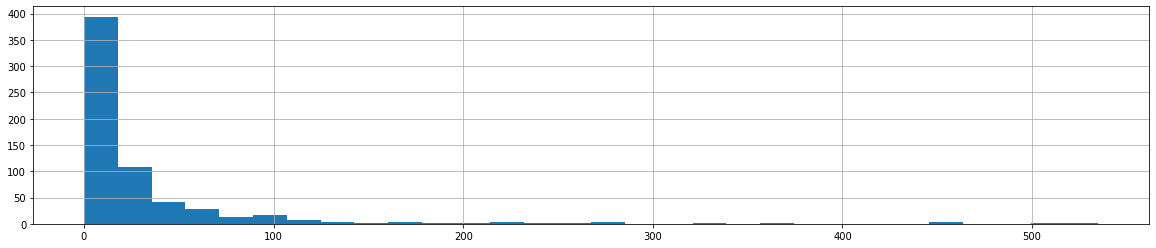

In [31]:
df['Review'].hist(bins=30, figsize=(20,4)); # распределение количества отзывов

In [32]:
df.count()

id                                  642
Review                              642
Star                                642
Value                               642
brandId                             642
brandName                           642
goodsName                           642
isSoldOut                           642
link                                642
lowQuantity                         642
ordersCount                         642
price                               642
qualityRate                         642
Вес с упаковкой (кг)                637
Длина кабеля                        625
Количество температурных режимов    614
Материал корпуса                    336
Модель                              637
Мощность устройства                 634
Объем чайника                       641
Страна бренда                       642
Страна производитель                642
Цвет                                642
sale_june                           642
dtype: int64

In [33]:
df[df['Review']>10].count()

id                                  329
Review                              329
Star                                329
Value                               329
brandId                             329
brandName                           329
goodsName                           329
isSoldOut                           329
link                                329
lowQuantity                         329
ordersCount                         329
price                               329
qualityRate                         329
Вес с упаковкой (кг)                326
Длина кабеля                        316
Количество температурных режимов    316
Материал корпуса                    165
Модель                              327
Мощность устройства                 323
Объем чайника                       328
Страна бренда                       329
Страна производитель                329
Цвет                                329
sale_june                           329
dtype: int64

In [34]:
df[df['Review']>10]['sale_june'].count()

329

### попробуем предсказать, будет ли у модели больше 10 отзывов

In [41]:
# отбор нужных столбцов
col =['Star', 'Value', 'brandId', 'brandName', 'goodsName',
       'isSoldOut', 'link', 'lowQuantity', 'ordersCount', 'price',
       'qualityRate', 'Вес с упаковкой (кг)', 'Длина кабеля',
       'Количество температурных режимов', 'Материал корпуса', 'Модель',
       'Мощность устройства', 'Объем чайника', 'Страна бренда',
       'Страна производитель', 'Цвет']

In [40]:
X = pd.DataFrame()
X

""


### код ниже преобразует категорийные данные в переменные и заполняет пропуски наиболее вероятным значением

In [49]:
df.head(10)

,id,Review,Star,Value,brandId,brandName,goodsName,isSoldOut,link,lowQuantity,...,Длина кабеля,Количество температурных режимов,Материал корпуса,Модель,Мощность устройства,Объем чайника,Страна бренда,Страна производитель,Цвет,sale_june
0,2171393,35,4,4193,16012,Philips,Чайник Avance Collection HD9340/90 со стеклянн...,0,https://www.wildberries.ru/catalog/2171393/det...,0,...,75.0,1,нержавеющая сталь; стекло,HD9340/90,2200.0,1.5,Нидерланды,Китай,"прозрачный, черный",0
1,2290060,15,3,1999,3300,Polaris,"Чайник PWK 1864CA, 1.8л. 1800Вт",0,https://www.wildberries.ru/catalog/2290060/det...,0,...,60.0,NaN,NaN,NaN,1800.0,1.8,Россия,Китай,серебристый,0
2,2389982,273,4,1883,16012,Philips,Чайник Daily Collection HD4646,0,https://www.wildberries.ru/catalog/2389982/det...,0,...,75.0,1,пластик,HD4646,2400.0,1.5,Нидерланды,Польша,черный,200
3,2389983,273,4,1883,16012,Philips,Чайник Daily Collection HD4646,0,https://www.wildberries.ru/catalog/2389983/det...,0,...,75.0,1,пластик,HD4646,2400.0,1.5,Нидерланды,Польша,"белый, красный",100
4,2389984,273,4,1883,16012,Philips,Чайник Daily Collection HD4646,0,https://www.wildberries.ru/catalog/2389984/det...,0,...,75.0,1,пластик,HD4646,2400.0,1.5,Нидерланды,Польша,"голубой, белый",200
5,2389993,9,4,2351,16012,Philips,Чайник HD9302/21,0,https://www.wildberries.ru/catalog/2389993/det...,0,...,75.0,1,NaN,HD9302/21,2200.0,1.5,Нидерланды,Китай,серебристый,0
6,2508310,48,5,2323,17158,Tefal,Чайник Tefal Express Plastic KO29913E,0,https://www.wildberries.ru/catalog/2508310/det...,0,...,80.0,1,пластик,KO29913E,2200.0,1.5,Франция,Китай,белый,100
7,2508424,23,4,1699,17158,Tefal,Чайник Tefal Travel-o-city KO120130,0,https://www.wildberries.ru/catalog/2508424/det...,0,...,80.0,1,пластик,KO 120,650.0,0.5,Франция,Китай,серый,0
8,2508436,21,4,3267,17158,Tefal,Чайник Tefal Express KI230D30,0,https://www.wildberries.ru/catalog/2508436/det...,0,...,NaN,1,нержавеющая сталь,KI230D30,2400.0,1.7,Франция,Китай,белый,0
9,2545012,127,4,1543,599,REDMOND,Чайник Redmond RK-G161,0,https://www.wildberries.ru/catalog/2545012/det...,0,...,NaN,NaN,NaN,RK-G161,NaN,NaN,Соединенные Штаты,Китай,черный,0


In [48]:
X = pd.DataFrame()
for i in col:
    if df[i].dtype.name != 'object':
        X[i]=df[i].copy()
        X.loc[X[i].isna(), i]=X[i].median()
    else:
        X[i]=pd.factorize(df[i])[0]
X.head(10)

,Star,Value,brandId,brandName,goodsName,isSoldOut,link,lowQuantity,ordersCount,price,...,Вес с упаковкой (кг),Длина кабеля,Количество температурных режимов,Материал корпуса,Модель,Мощность устройства,Объем чайника,Страна бренда,Страна производитель,Цвет
0,4.0,4193.0,16012.0,0,0,0.0,0,0.0,600.0,5990.0,...,1.62,75.0,0,0,0,2200.0,1.5,0,0,0
1,3.0,1999.0,3300.0,1,1,0.0,1,0.0,100.0,1999.0,...,1.35,60.0,-1,-1,-1,1800.0,1.8,1,0,1
2,4.0,1883.0,16012.0,0,2,0.0,2,0.0,2100.0,2990.0,...,1.30,75.0,0,1,1,2400.0,1.5,0,1,2
3,4.0,1883.0,16012.0,0,2,0.0,3,0.0,1000.0,2990.0,...,1.30,75.0,0,1,1,2400.0,1.5,0,1,3
4,4.0,1883.0,16012.0,0,2,0.0,4,0.0,700.0,2990.0,...,1.30,75.0,0,1,1,2400.0,1.5,0,1,4
5,4.0,2351.0,16012.0,0,3,0.0,5,0.0,200.0,2799.0,...,1.28,75.0,0,-1,2,2200.0,1.5,0,0,1
6,5.0,2323.0,17158.0,2,4,0.0,6,0.0,800.0,2799.0,...,1.20,80.0,0,1,3,2200.0,1.5,2,0,5
7,4.0,1699.0,17158.0,2,5,0.0,7,0.0,400.0,2499.0,...,1.00,80.0,0,1,4,650.0,0.5,2,0,6
8,4.0,3267.0,17158.0,2,6,0.0,8,0.0,400.0,4299.0,...,1.73,70.0,0,2,5,2400.0,1.7,2,0,5
9,4.0,1543.0,599.0,3,7,0.0,9,0.0,2300.0,1660.0,...,1.40,70.0,-1,-1,6,2200.0,1.7,3,0,2
